In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df3 = pd.read_csv(r"/content/adult.csv")
df3

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
df3.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df3.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


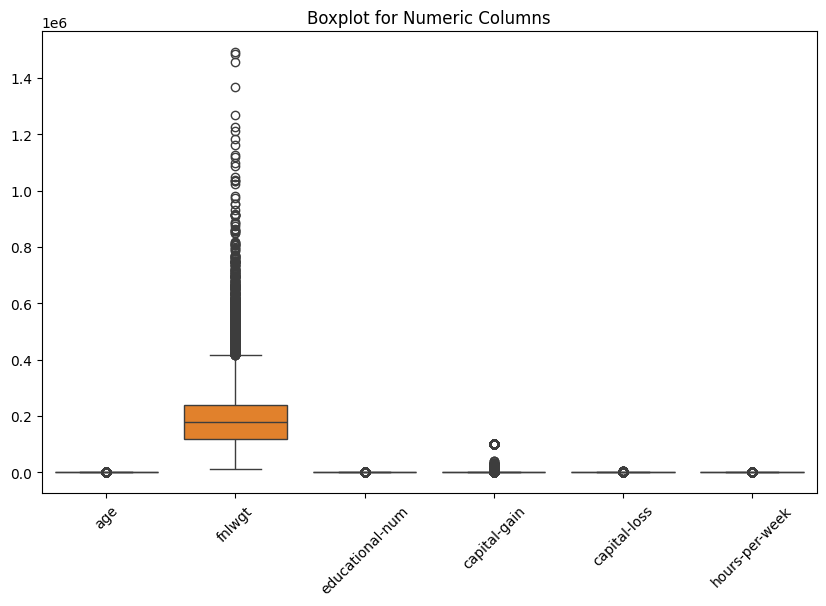

In [6]:
numeric_columns=['age',	'fnlwgt',	'educational-num',	'capital-gain',	'capital-loss',	'hours-per-week']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df3[numeric_columns])
plt.xticks(rotation=45)
plt.title('Boxplot for Numeric Columns')
plt.show()

In [7]:
Q1 = df3[numeric_columns].quantile(0.25)
Q3 = df3[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_mask = (df3[numeric_columns] < lower_bound) | (df3[numeric_columns] > upper_bound)

df3_no_outliers = df3[~outlier_mask.any(axis=1)]

print("Dataset before outlier removal:", df3.shape)
print("Dataset after outlier removal:", df3_no_outliers.shape)

Dataset before outlier removal: (48842, 15)
Dataset after outlier removal: (28558, 15)


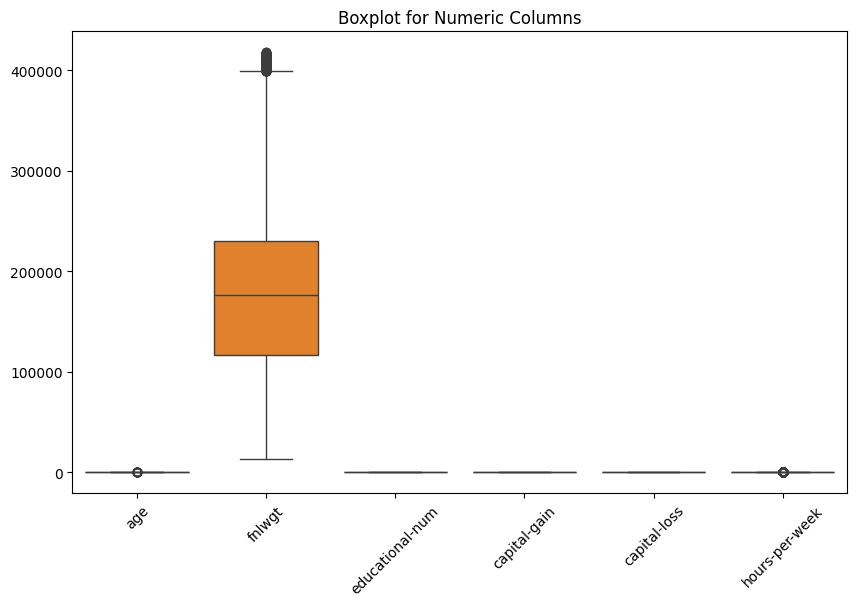

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df3_no_outliers[numeric_columns])
plt.xticks(rotation=45)
plt.title('Boxplot for Numeric Columns')
plt.show()

In [9]:
from sklearn.preprocessing import MinMaxScaler

numeric_columns=['age',	'fnlwgt',	'educational-num',	'capital-gain',	'capital-loss',	'hours-per-week']
scaler = MinMaxScaler()
df3[numeric_columns] = scaler.fit_transform(df3[numeric_columns])
df3[numeric_columns].head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,0.109589,0.145129,0.400000,0.000000,0.0,0.397959
1,0.287671,0.052451,0.533333,0.000000,0.0,0.500000
2,0.150685,0.219649,0.733333,0.000000,0.0,0.397959
3,0.369863,0.100153,0.600000,0.076881,0.0,0.397959
4,0.013699,0.061708,0.600000,0.000000,0.0,0.295918


In [10]:
df3["age"].mean()

np.float64(0.2964874717638592)

In [11]:
df3["age"].median()

0.27397260273972607

In [12]:
df3["age"].mode()

,age
0,0.260274


In [13]:
df3["age"].std()

0.18781520458143383

In [14]:
df3["age"].min()

0.0

In [15]:
df3["age"].max()

1.0

In [16]:
df3.groupby("income")["age"].mean()

,age
income,
<=50K,0.272222
>50K,0.373633


In [17]:
df3.groupby("income")["age"].median()

,age
income,
<=50K,0.232877
>50K,0.356164


In [18]:
df3.groupby("income")["age"].std()

,age
income,
<=50K,0.193207
>50K,0.144644


In [19]:
df3.groupby("income")["age"].max()

,age
income,
<=50K,1.0
>50K,1.0


In [20]:
df3.groupby("income")["age"].min()

,age
income,
<=50K,0.000000
>50K,0.027397


PART - 2- IRIS

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [22]:
df3=sns.load_dataset('iris')
df3

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [23]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [24]:
df3.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [25]:
df3.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


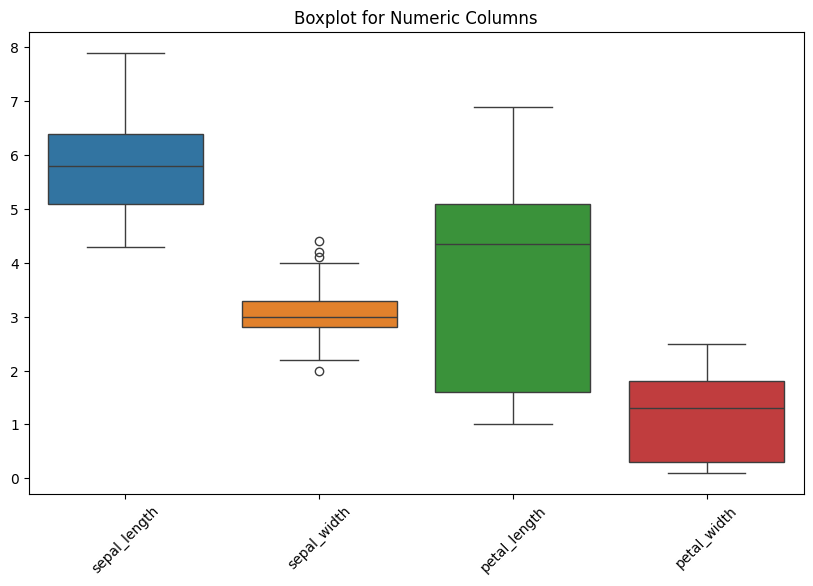

In [26]:
numeric_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df3[numeric_cols])
plt.xticks(rotation=45)
plt.title('Boxplot for Numeric Columns')
plt.show()

In [27]:
Q1 = df3[numeric_cols].quantile(0.25)
Q3 = df3[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_mask = (df3[numeric_cols] < lower_bound) | (df3[numeric_cols] > upper_bound)

df3_no_outliers = df3[~outlier_mask.any(axis=1)]

print("Dataset before outlier removal:", df3.shape)
print("Dataset after outlier removal:", df3_no_outliers.shape)

Dataset before outlier removal: (150, 5)
Dataset after outlier removal: (146, 5)


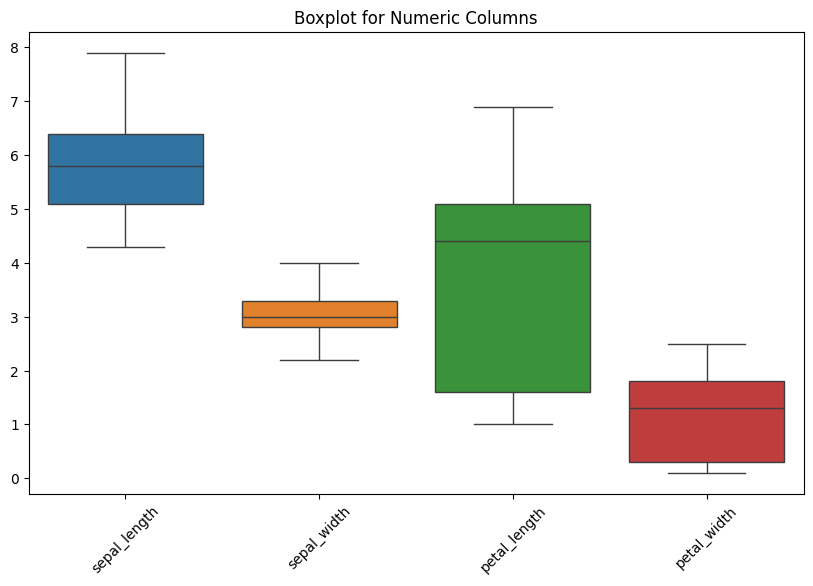

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df3_no_outliers[numeric_cols])
plt.xticks(rotation=45)
plt.title('Boxplot for Numeric Columns')
plt.show()

In [29]:
numeric_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

scaler = MinMaxScaler()
df3[numeric_cols] = scaler.fit_transform(df3[numeric_cols])
df3[numeric_cols].head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [30]:
setosa=df3[df3['species']=='setosa']
versicolor=df3[df3['species']=='versicolor']
virginica=df3[df3['species']=='virginica']

In [31]:
df3.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,0.196111,0.595000,0.078305,0.060833
versicolor,0.454444,0.320833,0.552542,0.510833
virginica,0.635556,0.405833,0.771525,0.802500


In [32]:
df3.groupby('species').std()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,0.097914,0.157943,0.029435,0.043911
versicolor,0.143381,0.130749,0.079646,0.082397
virginica,0.176633,0.134374,0.093541,0.114438


In [33]:
df3.groupby('species').quantile(0.25)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,0.138889,0.500000,0.067797,0.041667
versicolor,0.361111,0.218750,0.508475,0.458333
virginica,0.534722,0.333333,0.694915,0.708333


In [34]:
df3.groupby('species').quantile(0.75)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,0.250000,0.697917,0.097458,0.083333
versicolor,0.555556,0.416667,0.610169,0.583333
virginica,0.722222,0.489583,0.826271,0.916667


In [35]:
df3.groupby('species').min()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,0.000000,0.125000,0.000000,0.000000
versicolor,0.166667,0.000000,0.338983,0.375000
virginica,0.166667,0.083333,0.593220,0.541667


In [36]:
df3.groupby('species').max()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,0.416667,1.000000,0.152542,0.208333
versicolor,0.750000,0.583333,0.694915,0.708333
virginica,1.000000,0.750000,1.000000,1.000000


In [37]:
setosa.mean(numeric_only=True)

,0
sepal_length,0.196111
sepal_width,0.595000
petal_length,0.078305
petal_width,0.060833


In [38]:
setosa.median(numeric_only=True)

,0
sepal_length,0.194444
sepal_width,0.583333
petal_length,0.084746
petal_width,0.041667


In [39]:
setosa.std(numeric_only=True)

,0
sepal_length,0.097914
sepal_width,0.157943
petal_length,0.029435
petal_width,0.043911


In [40]:
virginica.std(numeric_only=True)

,0
sepal_length,0.176633
sepal_width,0.134374
petal_length,0.093541
petal_width,0.114438


In [41]:
virginica.mean(numeric_only=True)

,0
sepal_length,0.635556
sepal_width,0.405833
petal_length,0.771525
petal_width,0.802500


In [42]:
virginica.median(numeric_only=True)

,0
sepal_length,0.611111
sepal_width,0.416667
petal_length,0.771186
petal_width,0.791667


In [43]:
versicolor.mean(numeric_only=True)

,0
sepal_length,0.454444
sepal_width,0.320833
petal_length,0.552542
petal_width,0.510833


In [44]:
versicolor.std(numeric_only=True)

,0
sepal_length,0.143381
sepal_width,0.130749
petal_length,0.079646
petal_width,0.082397
